In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv('dronedata1000.csv')

In [3]:
dataset

,Temperature,Humidity,AirQuality,Carbonmonoxide,Gas,pressure,Latitude,Longitude,label
0,98,34,59,129,76,972,11.192490,77.164340,2
1,87,46,92,232,15,1006,11.159447,77.190210,2
2,118,41,71,169,29,965,11.166370,77.102925,1
3,101,48,86,5,71,1010,11.139488,77.142327,1
4,115,31,8,3,13,1061,11.193890,77.191036,2
...,...,...,...,...,...,...,...,...,...
996,114,35,56,107,45,1091,11.117671,77.189774,1
997,108,38,20,274,37,985,11.155485,77.168198,2
998,119,36,16,128,1,1018,11.133535,77.130832,2
999,116,39,33,305,77,918,11.180928,77.139973,2


Text(0.5, 1.0, 'Count of each Target Class')

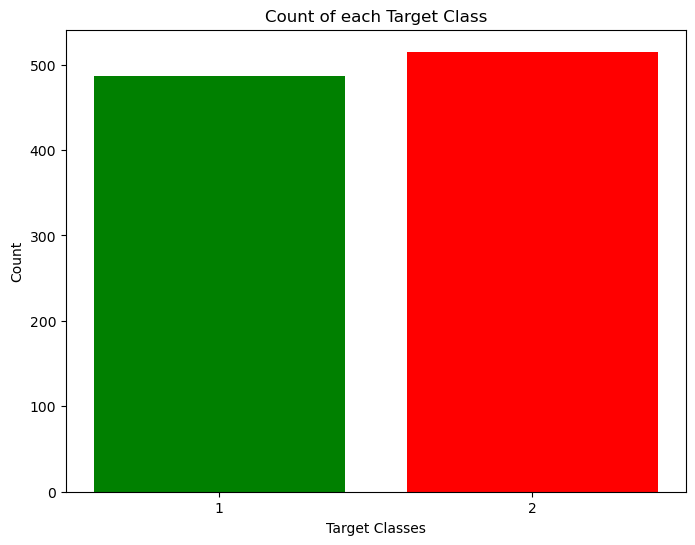

In [4]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['label'].unique(), dataset['label'].value_counts(), color = ['red', 'green'])
plt.xticks([2, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [5]:
y = dataset['label']
X = dataset.drop(['label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
gnb = GaussianNB()

In [7]:
gnb.fit(X_train, y_train)

GaussianNB()

In [8]:
import urllib
import requests
import re

In [9]:
link = "https://blynk.cloud/external/api/get?token=ew_Jv12VRB7PvwcQ602pDsp3aDoXrrDK&V0"
f = requests.get(link)
f1=f.text
f1="".join(c for c in f1 if c.isalnum())
link2 = "https://blynk.cloud/external/api/get?token=ew_Jv12VRB7PvwcQ602pDsp3aDoXrrDK&V1"
f = requests.get(link2)
f2=f.text
f2="".join(c for c in f2 if c.isalnum())
link3 = "https://blynk.cloud/external/api/get?token=ew_Jv12VRB7PvwcQ602pDsp3aDoXrrDK&V2"
f = requests.get(link3)
f3=f.text
#f3="".join(c for c in f3 if c.isalnum())

In [10]:
print(f1)
print(f2)
print(f3)
def spliter(line):
    dim = ['     LON:','H','AQ','CO','G','PIR','PRE']
    remove = ['LAT:','T','D']
    for word in remove:
        line = line.replace(word,"")   
    for word in dim:
        word = ""+word+""
        line = line.replace(word," ")
    return line.split(" ")
result1 = spliter(f1)
result2 = spliter(f2)
result3 = spliter(f3)

T32H40AQ31CO25G17
D113PIR1PRE969
LAT:11.10     LON:77.03


In [11]:
print('Temperature : ',result1[0])
print('Humidity : ',result1[1])
print('Air Quality : ',result1[2])
print('Carbon Monoxide : ',result1[3])
print('Gas : ',result1[4])
print('Pressure : ',result2[2])
print('Latitude : ',result3[0])
print('Longitude : ',result3[1])

Temperature :  32
Humidity :  40
Air Quality :  31
Carbon Monoxide :  25
Gas :  17
Pressure :  969
Latitude :  11.10
Longitude :  77.03


In [12]:
sensordata = [[int(result1[0]),int(result1[1]),int(result1[2]),int(result1[3]),int(result1[4]),int(result2[2]),float(result3[0]),float(result3[1])]]
#print(sensordata)

In [13]:
y_pred = gnb.predict(sensordata)

In [14]:
print(y_pred)

[2]


In [15]:
res1='2'
if y_pred==2:
    print('Good Weather')
    res1='0'
if y_pred==1:
    print('Not Good')
    res1='1'

Good Weather
